In [1]:
!pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.1 MB/

In [2]:
# Imports
import gradio as gr
import numpy as np
import io
import base64
import pathlib
import textwrap
import os
os.environ['PORT1'] = '8080'
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown


In [3]:
# Replace your Gemini API key below
## You can generate your API Key here - https://makersuite.google.com/app/apikey
# Generate API Key --> Goto Secrets --> Name = 'APIKEY' , Value = "Paste your API Key" and save

apiKey = userdata.get('APIKEY')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [4]:
import google.generativeai as genai

genai.configure(api_key = apiKey)

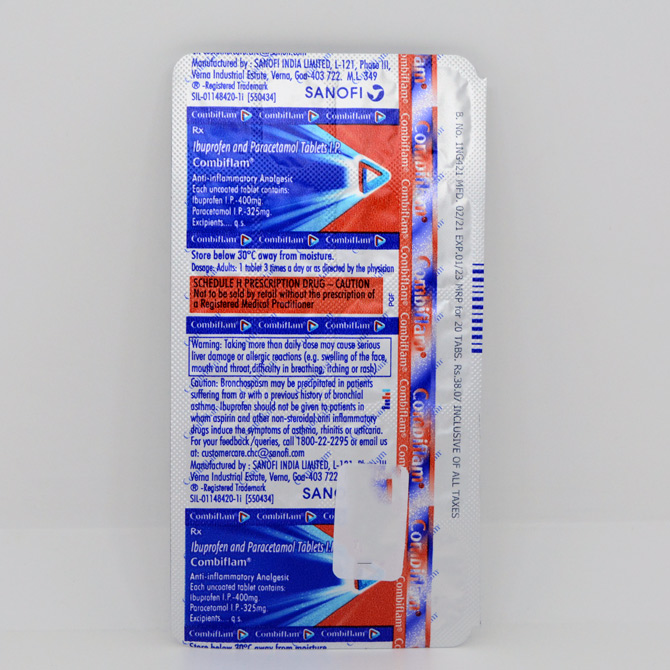

In [6]:
# Image to text
import PIL.Image

img = PIL.Image.open('/content/med1.jpg')
img

In [7]:
# Enable Gemini Pro Vision model
model = genai.GenerativeModel('gemini-pro-vision')

In [8]:
# Pass in prompt and image to the model and generate response
response = model.generate_content(["Write a prescription in pointer format ordered by name of medicine, symptoms, primary diagnosis, usage and dosage of medicine in the image .", img])
to_markdown(response.text)

# Write a prescription in 150 words for given image along with symptoms it cures, use and dosage.

>  **Medicine:** Combiflam
> 
> **Symptoms:** Fever, pain, and inflammation
> 
> **Primary diagnosis:** Not mentioned
> 
> **Usage:** Take 1 tablet 3 times a day or as directed by the physician
> 
> **Dosage:** 1 tablet 3 times a day

In [ ]:
response.candidates

[content {
  parts {
    text: " **Prescription**\n\n**Patient Name:** [Patient Name]\n\n**Age:** [Age]\n\n**Sex:** [Sex]\n\n**Date:** [Date]\n\n**Symptoms:**\n\nThe patient is complaining of heartburn, indigestion, and nausea.\n\n**Diagnosis:**\n\nThe patient is diagnosed with GERD (gastroesophageal reflux disease).\n\n**Medication:**\n\nThe patient is prescribed Zinetac (ranitidine) 150mg tablets.\n\n**Dosage:**\n\nThe patient is to take one tablet twice a day, 30 minutes before meals.\n\n**Instructions:**\n\nThe patient is to take the medication for 4 weeks. The patient is to avoid spicy, fatty, and acidic foods. The patient is to elevate the head of the bed by 6 inches. The patient is to avoid smoking and alcohol.\n\n**Refills:**\n\nThe patient is allowed 2 refills."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIB

In [10]:
# Create Gradio interface for sample app
# Running this cell will provide you a link to run the interface

def generate_prescription(image):
    response = model.generate_content(["Write a prescription in pointer format ordered by name of medicine, symptoms, primary diagnosis, usage and dosage of medicine in the image. Make sure to ask person to visit doctor if problem presists.", image])
    return response.text

interface = gr.Interface(fn=generate_prescription,
                    inputs=gr.Image(label="Upload image", type="pil"),
                    outputs=gr.Textbox(label="Your prescription is here:"),
                    title="Medicine Prescription",
                    description="Find Prescription to any medicine",
                    allow_flagging="never",
                    examples=["/content/med1.jpg", "/content/med2.jpg"])
interface.launch(debug = True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://93a0d2a625c8ddd9d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://93a0d2a625c8ddd9d2.gradio.live
